# Suggestions for a Finance Departmant in a bank using Logistic Regression Model (LRM)

This portfolio project is for the analysis of dataset from the bank and building of a predictive model that can provide insights to the Finance Department. The PACE framework which stands for Plan, Analyse, Construct and Execute is going to be followed.


# Pace:Plan

In this stage, we try to undersatnd the data in the problem context. 


# Understanding the business scenario and the problem

Loans are a significant source of income for banks. But risk is frequently attached to it. The borrowers might not repay the debt. In this scenario, the bank has made the decision to apply machine learning to alleviate this problem. It has gathered historical information on the loan borrowers, and wants to build a robust mechine learning (ML) model to determine whether a new borrower is likely to default or not. Again, it wants to assess what factors are likely to make the repayment of the loan impossible for borrowers. 

# Step 1. Imports

Importing packages and loading dataset

In [1]:
# Importing packages
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For data modeling
from xgboost import plot_importance
from sklearn.linear_model import LogisticRegression

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

# For saving models
import pickle

# Loading the dataset

In [2]:
# Load dataset into a dataframe
data=pd.read_csv('CBZ.csv')

In [3]:
#displaying the dataframe
data

,Age,Gender,Marital Status,Income,home_ownership,length_of_employment,purpose_of_loan,loan_grade,loan_amount,interest_rate,loan_status,loan_percent_income,History_of_Default,Length_of_Default_History
0,22,0,4,59000,RENT,156.0,PERSONAL USE,D,35000,16.0,1,0.59,Y,3
1,23,1,2,92111,RENT,7.0,MEDICAL PURPOSES,F,35000,20.0,1,0.32,N,4
2,23,1,4,113000,RENT,8.0,DEBT CONSOLIDATION,D,35000,18.0,1,0.31,N,4
3,24,1,3,10800,MORTGAGE,8.0,EDUCATION,B,1750,11.0,1,0.16,N,2
4,22,0,3,65000,RENT,4.0,EDUCATION,D,34000,18.0,1,0.52,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30864,57,0,1,53000,MORTGAGE,1.0,PERSONAL USE,C,5800,13.0,0,0.11,N,30
30865,54,0,1,120000,MORTGAGE,4.0,PERSONAL USE,A,17625,7.0,0,0.15,N,19
30866,65,0,2,76000,RENT,3.0,HOME RENOVATIONS,B,35000,11.0,1,0.46,N,28
30867,56,0,3,150000,MORTGAGE,5.0,PERSONAL USE,B,15000,11.0,0,0.10,N,26


In [4]:
# Display first few rows of the dataframe
data.head()

,Age,Gender,Marital Status,Income,home_ownership,length_of_employment,purpose_of_loan,loan_grade,loan_amount,interest_rate,loan_status,loan_percent_income,History_of_Default,Length_of_Default_History
0,22,0,4,59000,RENT,156.0,PERSONAL USE,D,35000,16.0,1,0.59,Y,3
1,23,1,2,92111,RENT,7.0,MEDICAL PURPOSES,F,35000,20.0,1,0.32,N,4
2,23,1,4,113000,RENT,8.0,DEBT CONSOLIDATION,D,35000,18.0,1,0.31,N,4
3,24,1,3,10800,MORTGAGE,8.0,EDUCATION,B,1750,11.0,1,0.16,N,2
4,22,0,3,65000,RENT,4.0,EDUCATION,D,34000,18.0,1,0.52,N,4


# Step 2. Data Exploration (Initial EDA and data cleaning)

a) Understand your variables

b) Clean your dataset (missing data, redundant data, outliers)

# Gathering basic information about the data

In [5]:
# Gathering basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30869 entries, 0 to 30868
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        30869 non-null  int64  
 1   Gender                     30869 non-null  int64  
 2   Marital Status             30869 non-null  int64  
 3   Income                     30869 non-null  int64  
 4   home_ownership             30869 non-null  object 
 5   length_of_employment       30014 non-null  float64
 6   purpose_of_loan            30869 non-null  object 
 7   loan_grade                 30869 non-null  object 
 8   loan_amount                30869 non-null  int64  
 9   interest_rate              27920 non-null  float64
 10  loan_status                30869 non-null  int64  
 11  loan_percent_income        30869 non-null  float64
 12  History_of_Default         30869 non-null  object 
 13  Length_of_Default_History  30869 non-null  int

# Gathering descriptive statistics about the data

In [6]:
# Gather descriptive statistics about the data
data.describe()

,Age,Gender,Marital Status,Income,length_of_employment,loan_amount,interest_rate,loan_status,loan_percent_income,Length_of_Default_History
count,30869.000000,30869.000000,30869.000000,3.086900e+04,30014.000000,30869.000000,27920.000000,30869.000000,30869.000000,30869.000000
mean,27.742914,0.501118,2.002494,6.538968e+04,4.778936,9562.388642,11.046956,0.229875,0.170950,5.808384
std,6.378228,0.500007,1.221710,6.080485e+04,4.211443,6317.368644,3.248749,0.420759,0.107478,4.067071
min,20.000000,0.000000,0.000000,4.000000e+03,0.000000,500.000000,5.000000,0.000000,0.000000,2.000000
25%,23.000000,0.000000,1.000000,3.810000e+04,2.000000,5000.000000,8.000000,0.000000,0.090000,3.000000
50%,26.000000,1.000000,2.000000,5.500000e+04,4.000000,8000.000000,11.000000,0.000000,0.150000,4.000000
75%,30.000000,1.000000,3.000000,7.999500e+04,7.000000,12250.000000,13.000000,0.000000,0.230000,8.000000
max,144.000000,1.000000,4.000000,6.000000e+06,156.000000,35000.000000,23.000000,1.000000,0.830000,30.000000


# Checking for the missing values in the dataframe

In [7]:
# Checking for missing values
data.isnull().sum()

Age                             0
Gender                          0
Marital Status                  0
Income                          0
home_ownership                  0
length_of_employment          855
purpose_of_loan                 0
loan_grade                      0
loan_amount                     0
interest_rate                2949
loan_status                     0
loan_percent_income             0
History_of_Default              0
Length_of_Default_History       0
dtype: int64

There are two variables that have missing values namely length_of_employment and interest_rate. One of the methods of solving for missingness is replacing the missing values by a median which is going to be used in this project. 

In [8]:
#finding the median of length_of_employment
data.loc[:,"length_of_employment"].median()

4.0

In [9]:
#finding the median of interest_rate
data.loc[:,"interest_rate"].median()

11.0

In [10]:
#filling in the missing values in the length_of_employment variable with the median
data['length_of_employment'].fillna(data['length_of_employment'].median(), inplace=True)

In [11]:
#filling in the missing values in the interest_rate variable with the median
data['interest_rate'].fillna(data['interest_rate'].median(), inplace=True)

In [12]:
#checking for missing values again
data.isnull().sum()

Age                          0
Gender                       0
Marital Status               0
Income                       0
home_ownership               0
length_of_employment         0
purpose_of_loan              0
loan_grade                   0
loan_amount                  0
interest_rate                0
loan_status                  0
loan_percent_income          0
History_of_Default           0
Length_of_Default_History    0
dtype: int64

No missing value in in the dataset now. The issue of missingness is solved

# Checking for duplicates in the dataframe

In [13]:
# Checking for duplicates
data.duplicated().sum()

13

13 rows contain duplicates. That is 4% of the data.

In [14]:
# Inspecting some rows containing duplicates as needed
data[data.duplicated()].head()

,Age,Gender,Marital Status,Income,home_ownership,length_of_employment,purpose_of_loan,loan_grade,loan_amount,interest_rate,loan_status,loan_percent_income,History_of_Default,Length_of_Default_History
15289,22,1,0,42000,RENT,0.0,PERSONAL USE,A,3600,7.0,0,0.09,N,3
15565,26,1,3,59000,RENT,2.0,PERSONAL USE,B,8500,12.0,0,0.14,N,4
15598,23,1,3,20664,RENT,4.0,EDUCATION,C,4550,14.0,0,0.22,Y,3
15905,21,0,4,33009,OWN,5.0,BUSINESS USE,B,12000,11.0,0,0.36,N,4
15924,25,1,2,89000,MORTGAGE,9.0,MEDICAL PURPOSES,A,14000,7.0,0,0.16,N,2


The above output shows the first five occurences of rows that are duplicated down in the dataframe. The duplicated rows should be dropped. 

In [15]:
# Dropping duplicates and saving resulting dataframe in a new variable as needed
Data = data.drop_duplicates(keep='first')

In [16]:
# Display first few rows of new dataframe as needed
Data.head()

,Age,Gender,Marital Status,Income,home_ownership,length_of_employment,purpose_of_loan,loan_grade,loan_amount,interest_rate,loan_status,loan_percent_income,History_of_Default,Length_of_Default_History
0,22,0,4,59000,RENT,156.0,PERSONAL USE,D,35000,16.0,1,0.59,Y,3
1,23,1,2,92111,RENT,7.0,MEDICAL PURPOSES,F,35000,20.0,1,0.32,N,4
2,23,1,4,113000,RENT,8.0,DEBT CONSOLIDATION,D,35000,18.0,1,0.31,N,4
3,24,1,3,10800,MORTGAGE,8.0,EDUCATION,B,1750,11.0,1,0.16,N,2
4,22,0,3,65000,RENT,4.0,EDUCATION,D,34000,18.0,1,0.52,N,4


In [17]:
Data.duplicated().sum()

0

# Checking for outliers in the dataframe

Outliers can have a significant impact on the accuracy and reliability of the model. It is important to detect and handle outliers appropriately to ensure that our model produces accurate and reliable information. Certain types of models are more sensitive to outliers than others. When we get to the stage of building your model, we will consider whether to remove these outliers based on the type of model we have decided to use.

# Using a boxplot to check for outliers

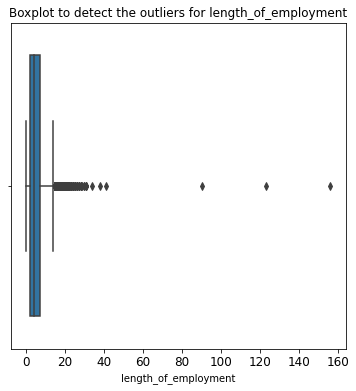

In [18]:
# Create a boxplot to visualize distribution of `Length_of_employment` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect the outliers for length_of_employment', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=Data['length_of_employment'])
plt.show()

# Determining the number of rows containing outliers 

In [19]:
# Compute the 25th percentile value in `tenure`
percentile25 = Data['length_of_employment'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = Data['length_of_employment'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = Data[(Data['length_of_employment'] > upper_limit) | (Data['length_of_employment'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `length_of_employment`:", len(outliers))

Lower limit: -5.5
Upper limit: 14.5
Number of rows in the data containing outliers in `length_of_employment`: 801


801 are rows of outliers from the length of employment which is 3% of our dataset

# pAce: Analyze stage

Performing Explanatory Data Analysis (EDA) by analyzing relationships between variables

# Step 2. Data Exploration (Continueing with  Explanatory Data Analysis)

Begining by understanding how many customers and what percentage of all customers this figure represents.

In [20]:
# Getting numbers of people who did not default vs. people who defaulted
print(Data['loan_status'].value_counts())
print()

# Getting percentages of people who did not default vs. who defaulted
print(Data['loan_status'].value_counts(normalize=True))

0    23760
1     7096
Name: loan_status, dtype: int64

0    0.770029
1    0.229971
Name: loan_status, dtype: float64


From the output above we can see that in our data there are 23 760 customers who did not default loan repayment which is around 77% of the data. 7 096 is the figure of customers who defaulted the loan repayment which is 23% of the data.

# Data Visualizations

Now, examining variables that we are interested in, and creating plots to visualize relationships between variables in the data.
We could start by creating a stacked boxplot showing loan_amount and interest_rate comparing the distributions of customers who defaulted loan repayment versus those who managed to repay back the loan.

Box plots are very useful in visualizing distributions within data, but they can be deceiving without the context of how big the sample sizes that they represent are. So, we could also plot a stacked histogram to visualize the distribution of the customers  who defaulted and those who did not default the loan repayment.

Visualising loan amount by interest using boxplots and using the histogram to see the distributions of who did not default and who defaulted

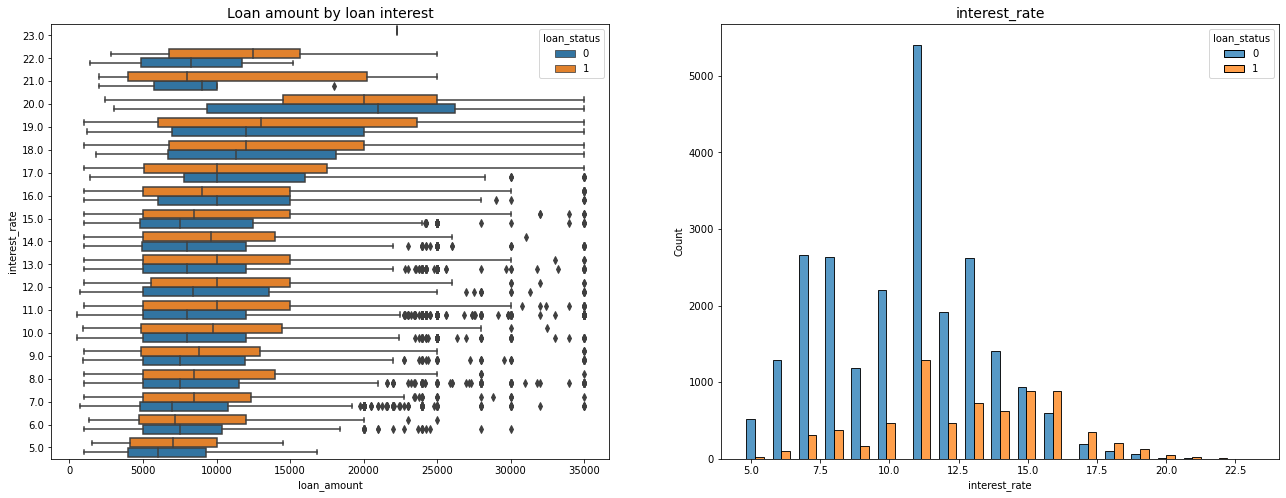

In [21]:
# Creating a plot as needed
# Setting figure and axes
fig, ax=plt.subplots(1,2, figsize=(22,8))
# Creating boxplot showing `loan_amount` distributions for `interest_rates`, comparing cutomers who defaulted versus those who did not default
sns.boxplot(data=Data, x='loan_amount', y='interest_rate', hue='loan_status', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title("Loan amount by loan interest", fontsize='14')
# Creating histogram showing distribution of `loan_amount`, comparing customers who defaulted versus those who did not
loan_default=Data[Data['loan_status']==1]['interest_rate']
loan_ndefault=Data[Data['loan_status']==0]['interest_rate']
sns.histplot(data=Data, x='interest_rate', hue='loan_status', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('interest_rate', fontsize='14')
# Displaying the plots
plt.show()

In [22]:
#finding the number of people who defaulted and ones that did not default caused by the interest_rate
Data[Data['interest_rate']==7]['loan_status'].value_counts()

0    2663
1     309
Name: loan_status, dtype: int64

In [23]:
#finding the mean of interest_rate
Data['Income'].mean()

65391.72964739435

Text(0.5, 1.0, 'monthly income by length of employment')

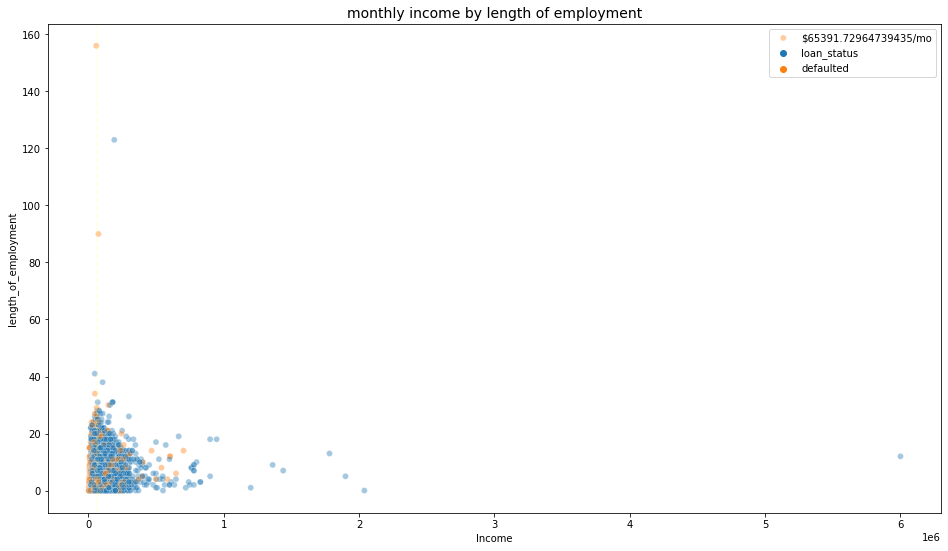

In [24]:
#creating a scatterplot of Income vs length of employment
plt.figure(figsize=(16,9))
sns.scatterplot(data=Data, x='Income', y='length_of_employment',hue='loan_status', alpha=0.4)
plt.axvline(x=65391.72964739435, color='#ff63', label='$65391.72964739435/mo', ls='--' )
plt.legend(labels=['$65391.72964739435/mo', 'loan_status', 'defaulted'])
plt.title('monthly income by length of employment', fontsize='14')

In [25]:
Data.groupby(['loan_status'])['Income'].agg([np.mean,np.median])

,mean,median
loan_status,,
0,70253.732744,60000.0
1,49111.967306,41496.0


In [26]:
Data['Income'].describe()

count    3.085600e+04
mean     6.539173e+04
std      6.081482e+04
min      4.000000e+03
25%      3.810000e+04
50%      5.500000e+04
75%      7.999275e+04
max      6.000000e+06
Name: Income, dtype: float64

Text(0.5, 1.0, 'monthly income by loan_amount')

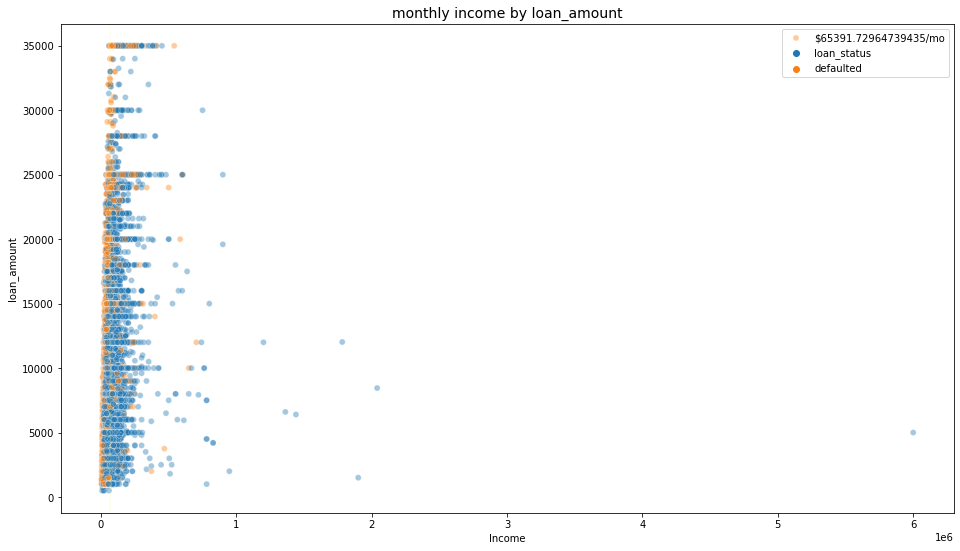

In [27]:
#creating a scatterplot of Income vs loan_amount
plt.figure(figsize=(16,9))
sns.scatterplot(data=Data, x='Income', y='loan_amount',hue='loan_status', alpha=0.4)
plt.axvline(x=65391.72964739435, color='#ff63', label='$65391.72964739435/mo', ls='--' )
plt.legend(labels=['$65391.72964739435/mo', 'loan_status', 'defaulted'])
plt.title('monthly income by loan_amount', fontsize='14')

In [28]:
#Display counts for each loan_purpose
Data['purpose_of_loan'].value_counts()

EDUCATION             6087
MEDICAL PURPOSES      5762
BUSINESS USE          5375
PERSONAL USE          5235
DEBT CONSOLIDATION    4970
HOME RENOVATIONS      3427
Name: purpose_of_loan, dtype: int64

Text(0.5, 1.0, 'Counts of defaulted/not_defaulted by purpose_of_loan')

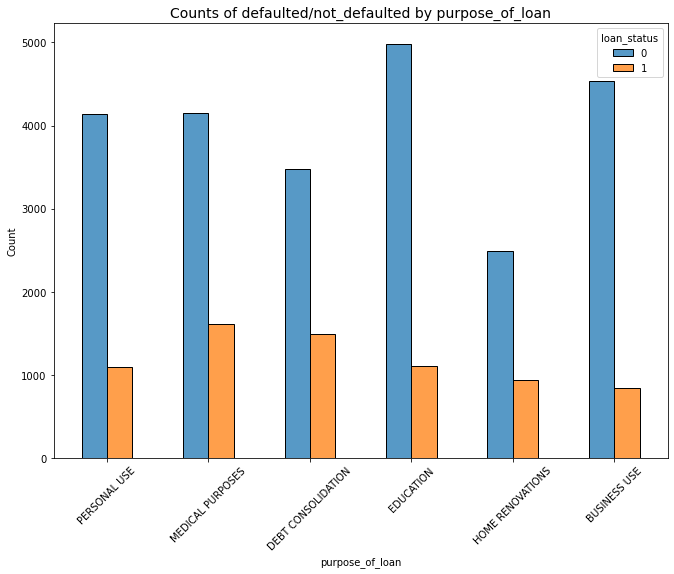

In [29]:
#creating a stacked histogram to compare purpose_of_loan distributions for those who defaulted against those who did not default
plt.figure(figsize=(11,8))
sns.histplot(data=Data, x='purpose_of_loan', hue='loan_status', discrete=1, hue_order=[0,1], multiple='dodge', shrink=.5)
plt.xticks(rotation='45')
plt.title('Counts of defaulted/not_defaulted by purpose_of_loan', fontsize=14)

There does not seem to be any purpose_of_loan that differs significantlyin its proportion of clients who defauted to those who did not default. 

Lastly we can check for strong correlations between variables in the data

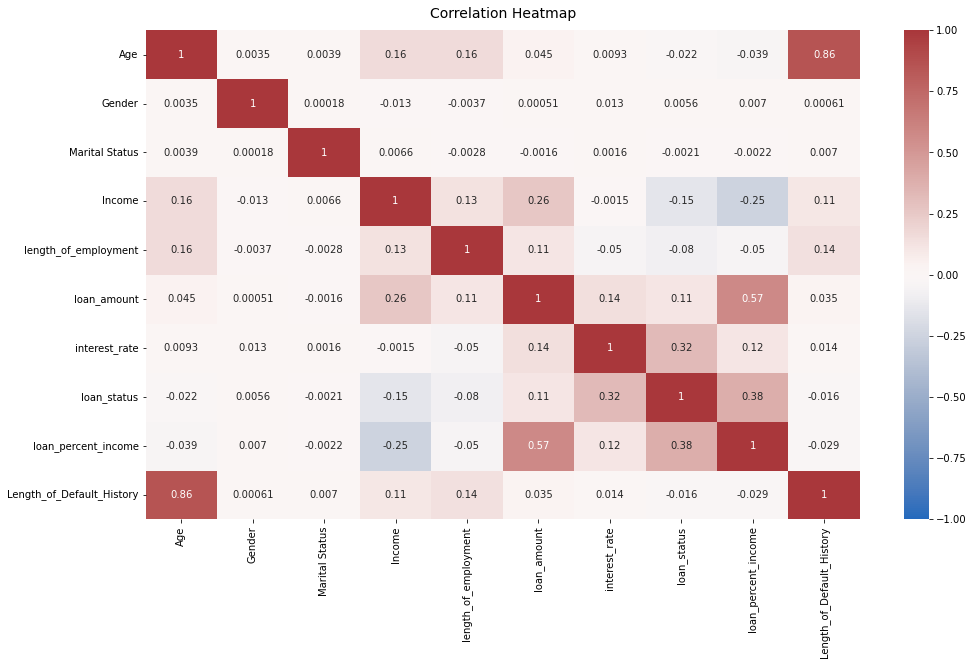

In [30]:
#plotting a correlation heatmap
plt.figure(figsize=(16,9))
heatmap=sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

# Insights

From the heapmat above it appears that the clients are defaulting due to Age, Marrital Status, Income, Length_of_employment and Length_of_Default_History. 

# paCe:Construct Stage

From our dataset there are some categorical variables which are: home_ownership, purpose_of_loan, loan_grade and History_of_Default. We convert these categorical variables to numerical variables using the LabelEncoder

In [31]:
#importing the library for the conversion of categorical data to mumerical data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [32]:
#conversion of categorical data to numerical data
Data.home_ownership=le.fit_transform(Data.home_ownership)
Data.purpose_of_loan=le.fit_transform(Data.purpose_of_loan)
Data.loan_grade=le.fit_transform(Data.loan_grade)
Data.History_of_Default=le.fit_transform(Data.History_of_Default)

C:\Users\MuvirimiT\miniconda3\envs\KV7006\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


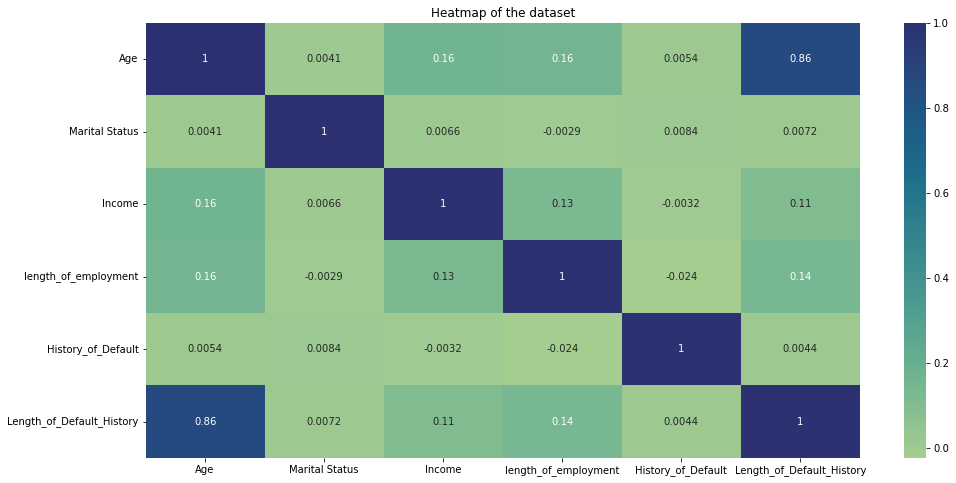

In [33]:
#creating the heatmap for the variables we are interested in
plt.figure(figsize=(16, 8))
sns.heatmap(Data[['Age', 'Marital Status', 'Income','length_of_employment', 'History_of_Default', 'Length_of_Default_History']].corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

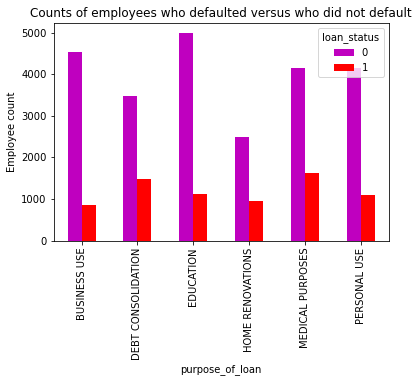

In [34]:
#creating a stacked bart plot to visualize number of clients across the bank who borrowed the money and defaulted and not defaulted
pd.crosstab(data['purpose_of_loan'], data['loan_status']).plot(kind='bar', color='mr')
plt.title('Counts of employees who defaulted versus who did not default')
plt.ylabel('Employee count')
plt.xlabel('purpose_of_loan')
plt.show()

Since logistic regression is quite sensitive to outliers, it would be a good idea at this stage to remove the outliers in the length of employment column that were identified earlier.

In [35]:
#selecting rows without outliers in 'length_of_employment' and saving the resulting dataframe
df_logreg = Data[(Data['length_of_employment'] >= lower_limit) & (Data['length_of_employment'] <= upper_limit)]

df_logreg.head()

,Age,Gender,Marital Status,Income,home_ownership,length_of_employment,purpose_of_loan,loan_grade,loan_amount,interest_rate,loan_status,loan_percent_income,History_of_Default,Length_of_Default_History
1,23,1,2,92111,3,7.0,4,5,35000,20.0,1,0.32,0,4
2,23,1,4,113000,3,8.0,1,3,35000,18.0,1,0.31,0,4
3,24,1,3,10800,0,8.0,2,1,1750,11.0,1,0.16,0,2
4,22,0,3,65000,3,4.0,2,3,34000,18.0,1,0.52,0,4
5,22,0,1,80000,3,3.0,5,3,33950,15.0,1,0.42,1,4


In [36]:
#checking for the missing values in the df_logreg dataframe
df_logreg.isnull().sum()

Age                          0
Gender                       0
Marital Status               0
Income                       0
home_ownership               0
length_of_employment         0
purpose_of_loan              0
loan_grade                   0
loan_amount                  0
interest_rate                0
loan_status                  0
loan_percent_income          0
History_of_Default           0
Length_of_Default_History    0
dtype: int64

We should isolate the outcome variable, which is the variable we want to predict

In [37]:
#isolate the outcome variable
y = df_logreg['loan_status']
#displaying the first few rows of the outcome variable
y.head() 

1    1
2    1
3    1
4    1
5    1
Name: loan_status, dtype: int64

We need to select the variables that we need to use in our model and consider which variables that will help us to predict the outcome variable, loan_status.

In [38]:
#selecting the variables we want to use in our model
X=df_logreg.drop('loan_status', axis=1)
#displaying the first few rows of the selected variables
X.head()

,Age,Gender,Marital Status,Income,home_ownership,length_of_employment,purpose_of_loan,loan_grade,loan_amount,interest_rate,loan_percent_income,History_of_Default,Length_of_Default_History
1,23,1,2,92111,3,7.0,4,5,35000,20.0,0.32,0,4
2,23,1,4,113000,3,8.0,1,3,35000,18.0,0.31,0,4
3,24,1,3,10800,0,8.0,2,1,1750,11.0,0.16,0,2
4,22,0,3,65000,3,4.0,2,3,34000,18.0,0.52,0,4
5,22,0,1,80000,3,3.0,5,3,33950,15.0,0.42,1,4


We need to split our data into training and testing set. We will again stratify the data based on the values in y, since classes are unbalanced

In [39]:
#splitting the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Constructing a logistic regression model and fitting it into the training dataset

In [40]:
#Constructing a logistic regression model and fitting it into the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

Testing the logistic regression model 

In [41]:
#using the logistic regression to get predictions on the test set
y_pred = log_clf.predict(X_test)

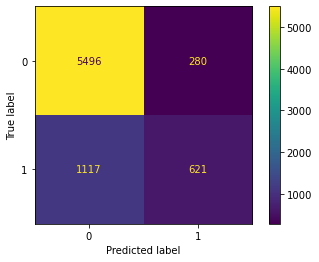

In [42]:
 #Computing values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Creating a display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plotting a confusion matrix
log_disp.plot(values_format='')

# Displaying a plot
plt.show()

The class balance of the dataset that has been splitted should be checked.

In [43]:
#checking the class balance in the dataset
df_logreg['loan_status'].value_counts(normalize=True)

0    0.768691
1    0.231309
Name: loan_status, dtype: float64

There is an approximately 77% and 23% split, so the data is not perfectly balanced. 

A classification report is constructed to show precision, recall, f1_score, and accuracy metrics in order to evaluate the performance of our logistic regression model.

In [44]:
# Create classification report for logistic regression model
target_names = ['Predicted would not default', 'Predicted would default']
print(classification_report(y_test, y_pred, target_names=target_names))

                             precision    recall  f1-score   support

Predicted would not default       0.83      0.95      0.89      5776
    Predicted would default       0.69      0.36      0.47      1738

                   accuracy                           0.81      7514
                  macro avg       0.76      0.65      0.68      7514
               weighted avg       0.80      0.81      0.79      7514



The classification report above shows that the logistic regression model achieved a precision of 80%, recall of 82%, f1-score of 80%, and accuracy of 82%. 

The feature importance of the of our variables in their order is very important and should be displayed

In [45]:
#finding the coefficients
coefficients = log_clf.coef_[0]

<AxesSubplot:ylabel='Feature'>

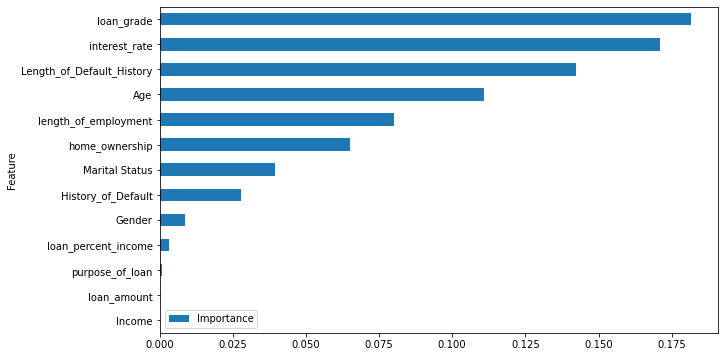

In [46]:
#displaying the feature importance of our variables using a horizontal bar graph
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [47]:
#displaying the coefficients
coefficients

array([-1.10903805e-01, -8.85231932e-03, -3.92800456e-02, -3.51709246e-05,
        6.50504050e-02, -8.00230202e-02, -9.57254748e-04,  1.81599726e-01,
        1.06187109e-04,  1.71122262e-01,  3.35157880e-03,  2.79384205e-02,
        1.42185058e-01])

<AxesSubplot:xlabel='Feature'>

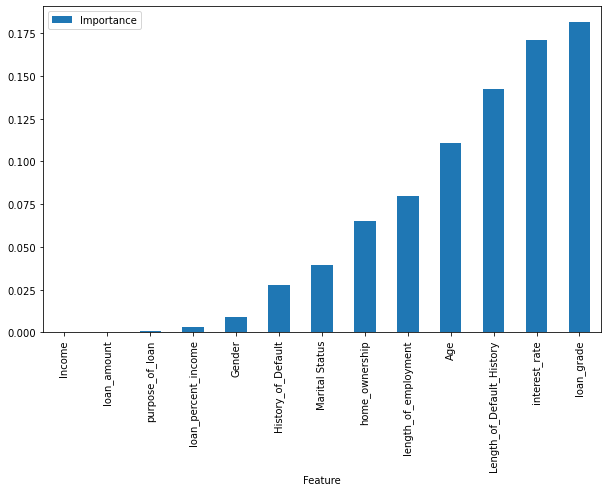

In [48]:
#displaying the feature importance of our variables using a ver bar graph
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='bar', figsize=(10, 6))

From the bar graphs above we can see that the bars of the bar graph are in ascending order showing showing the importance of the variables in predicting whether a client who has borrowed the money is likely to default or not.

# pacE:Execute Stage

The accuracy is 81%. This is the percentage of the correct predictions from all predictions made using the Logistic Regression.  



The precision of our Logistic Regression is 80%. This means that for all the sets of data collected from the beginning of the period and to the end of the same period that the model predicted would not default only 80% did.


For the recall: Out of all the sets of data that did not default, the model only predicted this outcome correctly for 81% of those sets of data. 


The F1-Score is 79%. Since this value is not that very close to 1, it tells us that the model does a moderate job of predicting whether or not the sets of data will not default. 